In [2]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as py
import pandas as pd
import warnings               #to avoid any warnings

warnings.filterwarnings('ignore')

df=pd.read_csv('haberman.csv')

#data-preprocessing

#changing the dataframe columns name
df.columns=["Age","operation_yr","axil_nodes","surv_status"]

#changing type of surv_staus and map 1:survive and 2:survive 
df['surv_status'] = df.surv_status.astype(object)
df['surv_status'] = df['surv_status'].map({1:"survive", 2:"not-survive"})

print("First 4 observation\n--------------------\n",df.head())
print("\nDimension of the Dataset is",df.shape)




First 4 observation
--------------------
    Age  operation_yr  axil_nodes surv_status
0   30            62           3     survive
1   30            65           0     survive
2   31            59           2     survive
3   31            65           4     survive
4   33            58          10     survive

Dimension of the Dataset is (305, 4)


In [3]:
#statistical description
print(df.describe())

              Age  operation_yr  axil_nodes
count  305.000000    305.000000  305.000000
mean    52.531148     62.849180    4.036066
std     10.744024      3.254078    7.199370
min     30.000000     58.000000    0.000000
25%     44.000000     60.000000    0.000000
50%     52.000000     63.000000    1.000000
75%     61.000000     66.000000    4.000000
max     83.000000     69.000000   52.000000


In [4]:
df['surv_status'].value_counts()

survive        224
not-survive     81
Name: surv_status, dtype: int64

OBSERVATION I
------------------------
- The given dataset is imbalanced because 73% are survive and 27% are not survived
- The min age of the patients is 30 and max age is 83
- Mean age is 52, and standard-deviation(spread) is 10.74 
- Median age is 52
- Max-axile nodes is 52 and min-axile nodes is 0, but median is only 0


# Univarent analysis

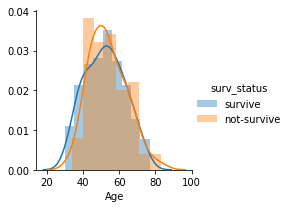

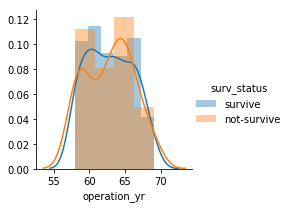

<Figure size 432x288 with 0 Axes>

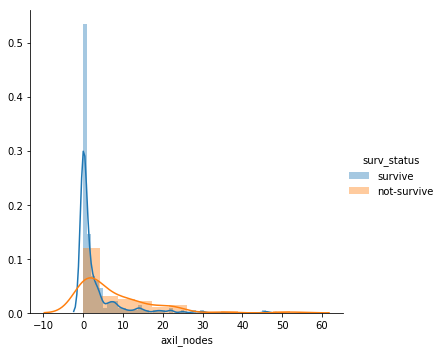

<Figure size 432x288 with 0 Axes>

In [5]:
#Dist-plot

g=sn.FacetGrid(df,hue='surv_status')
g.map(sn.distplot,'Age')
g.add_legend()
py.figure(1)
py.show()

g=sn.FacetGrid(df,hue='surv_status')
g.map(sn.distplot,'operation_yr')
g.add_legend()
py.figure(2)
py.show()
#-----------------------------------------------------------
#giving better observation compare to the above distplots
g=sn.FacetGrid(df,hue='surv_status',height=5)
g.map(sn.distplot,'axil_nodes')
g.add_legend()
py.figure(2)
py.show()
#The number of axile nodes are high between range 0 to 5

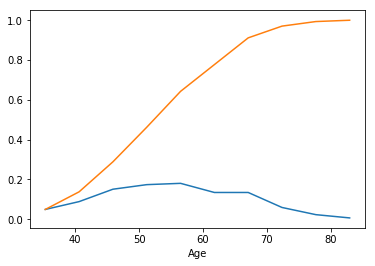

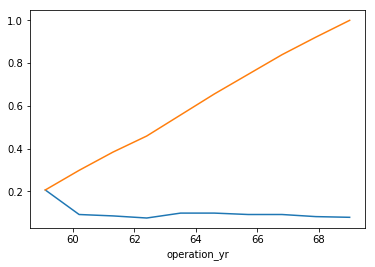

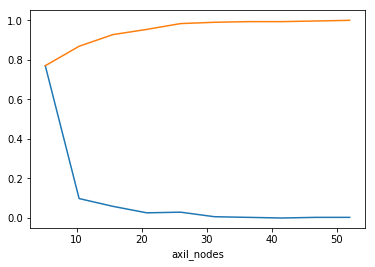

In [6]:
#pdf and cdf plots
py.figure(1)
count1, bin_edges1 = np.histogram(df['Age'],bins=10,density=True)
pdf1=count1/(sum(count1))
cdf1=np.cumsum(pdf1)
py.xlabel('Age')
py.plot(bin_edges1[1:],pdf1)
py.plot(bin_edges1[1:],cdf1)

#------------------------------------------------------------------
py.figure(2)
count1, bin_edges1 = np.histogram(df['operation_yr'],bins=10,density=True)
pdf1=count1/(sum(count1))
cdf1=np.cumsum(pdf1)
py.xlabel('operation_yr')
py.plot(bin_edges1[1:],pdf1)
py.plot(bin_edges1[1:],cdf1)

#------------------------------------------------------------------

py.figure(3)
count1, bin_edges1 = np.histogram(df['axil_nodes'],bins=10,density=True)
pdf1=count1/(sum(count1))
cdf1=np.cumsum(pdf1)
py.xlabel('axil_nodes')
py.plot(bin_edges1[1:],pdf1)
py.plot(bin_edges1[1:],cdf1)


In [7]:
#80percentile
print("80 Percentile of axile_nodes is",np.percentile(df['axil_nodes'],80))


80 Percentile of axile_nodes is 7.0


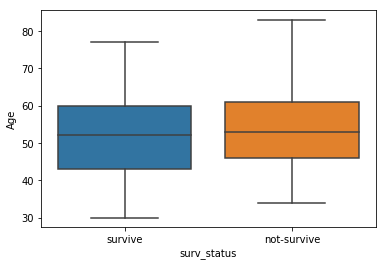

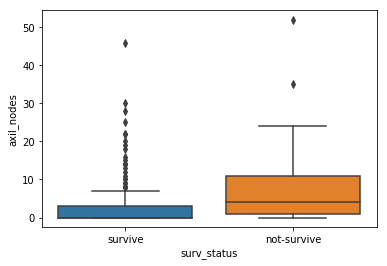

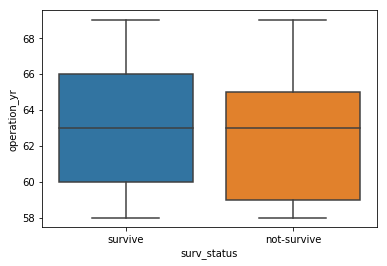

In [8]:
#box-plot
sn.boxplot(x='surv_status',y='Age',data=df)
py.show()
sn.boxplot(x='surv_status',y='axil_nodes',data=df)
py.show()
sn.boxplot(x='surv_status',y='operation_yr',data=df)
py.show()

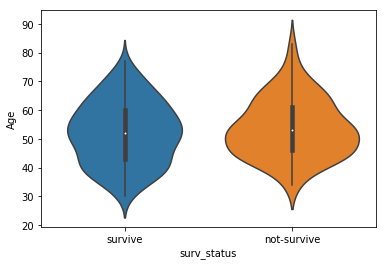

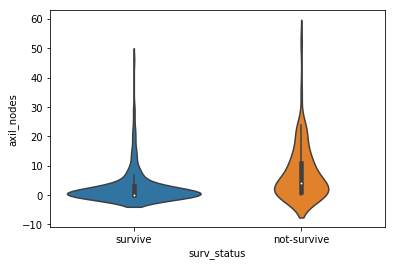

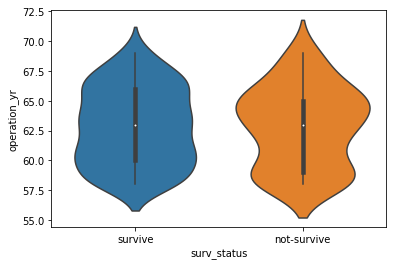

In [14]:
#violin-plots(Combination of Box-plot with PDF)
sn.violinplot(x='surv_status',y='Age',data=df)
py.show()
sn.violinplot(x='surv_status',y='axil_nodes',data=df)
py.show()
sn.violinplot(x='surv_status',y='operation_yr',data=df)
py.show()


Observation 2
---------------------
-  Around 80% of patient age are less 65 from CDF plots
-  40% of patients undergo there operation between year 58-61 from CDF plots
-  Around 80% of patients having 0 to 7 axile nodes from CDF plots
-  Patients having axile nodes greater than 5 are less chance to survive from   CDF and Box-plots
-  Patients undergo operation after 1965 have slightly chance to survive the   rest, and patients undergo operation before 1960 are have less chance to survive from the Box-plot